In [2]:
import cv2
cap_file = cv2.VideoCapture('sample_.mov')
print(type(cap_file))
# <class 'cv2.VideoCapture'>

print(cap_file.isOpened())
# True

<class 'cv2.VideoCapture'>
True


In [12]:
#単純に表示
import cv2
import sys

file_path = 'sample_.mov'
delay = 1
window_name = 'frame'

cap = cv2.VideoCapture(file_path)
text = 'text.wmv'

if not cap.isOpened():
    sys.exit()

while True:
    ret, frame = cap.read()
    if not ret:
        break
    if ret:
        frame = cv2.resize(frame, dsize=(600, 400))
        cv2.imshow(window_name, frame)
        if cv2.waitKey(delay) & 0xFF == ord('q'):
            break
    else:
        cap.set(cv2.CAP_PROP_POS_FRAMES, 0)

cv2.destroyWindow(window_name)

In [13]:
#単純に表示（字幕あり）
import cv2
import sys

file_path = 'sample_.mov'
delay = 1
window_name = 'frame'

cap = cv2.VideoCapture(file_path)
text = 'text.wmv'

if not cap.isOpened():
    sys.exit()

while True:
    ret, frame = cap.read()
    if ret:
        frame = cv2.resize(frame, dsize=(600, 400))
        cv2.putText(frame, text,(100, 30), cv2.FONT_HERSHEY_SIMPLEX, 5, (0, 255, 0), thickness=2)
        cv2.imshow(window_name, frame)
        if cv2.waitKey(delay) & 0xFF == ord('q'):
            break
    else:
        cap.set(cv2.CAP_PROP_POS_FRAMES, 0)

cv2.destroyWindow(window_name)

In [2]:
#二値化して線引いた処理
import cv2
import sys

camera_id = 0
delay = 1
window_name = 'frame'
file_path = 'sample_.mov'

cap = cv2.VideoCapture(file_path)

import numpy as np
bgrLower = np.array([0, 100, 100])    # 抽出する色の下限(BGR)
bgrUpper = np.array([250,250, 250])

if not cap.isOpened():
    sys.exit()

while True:
    ret, frame = cap.read()
    if not ret:
        break
    frame = cv2.resize(frame, dsize=(600, 400))

    img_mask = cv2.inRange(frame, bgrLower, bgrUpper) 
    contours, hierarchy = cv2.findContours(img_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours.sort(key=lambda x: cv2.contourArea(x), reverse=True)
    #target_contour = max(contours, key=lambda x: cv2.contourArea(x))
    #img_mask = cv2.line(img_mask, (250,300), (350,300), (120,120,120), 10) #第2引数が始点、第3引数が終点、第4引数が色、第5引数が線の太さ
    #img_mask=cv2.drawContours(img_mask,contours[0:2],-1,(120,120,120),5)

    cv2.imshow(window_name, img_mask)
    #cv2.imshow(window_name,img_mask, [contours[0],contours[1]])

    if cv2.waitKey(delay) & 0xFF == ord('q'):
        break

cv2.destroyWindow(window_name)

In [ ]:
import numpy as np
import cv2

cap = cv2.VideoCapture('0940.wmv')

# params for ShiTomasi corner detection
feature_params = dict( maxCorners = 100,
                       qualityLevel = 0.3,
                       minDistance = 7,
                       blockSize = 7 )

# Parameters for lucas kanade optical flow
lk_params = dict( winSize  = (15,15),
                  maxLevel = 2,
                  criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))

# Create some random colors
color = np.random.randint(0,255,(100,3))

# Take first frame and find corners in it

bgrLower = np.array([0, 100, 100])    # 抽出する色の下限(BGR)
bgrUpper = np.array([250,250, 250])

ret, old_frame = cap.read()
#old_gray = cv2.cvtColor(old_frame, cv2.COLOR_BGR2GRAY)
old_gray = cv2.inRange(old_frame, bgrLower, bgrUpper) 
p0 = cv2.goodFeaturesToTrack(old_gray, mask = None, **feature_params)

# Create a mask image for drawing purposes
mask = np.zeros_like(old_frame)

while(1):
    ret,frame = cap.read()
    #frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    frame_gray =cv2.inRange(frame, bgrLower, bgrUpper) 

    # calculate optical flow
    p1, st, err = cv2.calcOpticalFlowPyrLK(old_gray, frame_gray, p0, None, **lk_params)

    # Select good points
    good_new = p1[st==1]
    good_old = p0[st==1]

    # draw the tracks
    for i,(new,old) in enumerate(zip(good_new,good_old)):
        a,b = new.ravel()
        c,d = old.ravel()
        mask = cv2.line(mask, (a,b),(c,d), color[i].tolist(), 2)
        frame = cv2.circle(frame,(a,b),5,color[i].tolist(),-1)
    img = cv2.add(frame,mask)

    cv2.imshow('frame',img)
    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break

    # Now update the previous frame and previous points
    old_gray = frame_gray.copy()
    p0 = good_new.reshape(-1,1,2)

cv2.destroyAllWindows()
cap.release()

In [80]:
#二値化してcontoursで囲う処理
import cv2
import sys
import math
import matplotlib.pyplot as plt

camera_id = 0
delay = 1
window_name1 = 'Nozzle'
window_name2 = 'Nozzle'
file_path = 'sample_.MOV'
text=''
cap = cv2.VideoCapture(file_path)

import numpy as np
bgrLower = np.array([0, 0, 170])    # 抽出する色の下限(BGR)
bgrUpper = np.array([255,255, 255])     # 抽出する色の上限(BGR)

if not cap.isOpened():
    sys.exit()

idx = 0
    
while True:

    ret, frame = cap.read()
    if not ret:
        break
    frame = cv2.resize(frame, dsize=(600, 400))
    
    idx += 1

    img_mask = cv2.inRange(frame, bgrLower, bgrUpper) #二値化処理
    contours, hierarchy = cv2.findContours(img_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)#境界引き
    contours.sort(key=lambda x: cv2.contourArea(x), reverse=True)#境界をソート
    target_contour = max(contours, key=lambda x: cv2.contourArea(x))
    #img_mask = cv2.line(img_mask, (250,300), (350,300), (120,120,120), 10) #第2引数が始点、第3引数が終点、第4引数が色、第5引数が線の太さ
    
    img_mask=cv2.drawContours(img_mask,contours[0:5],-1,(120,120,120),5)
    x1=np.unravel_index(np.argmax(contours[0],axis=0), contours[0].shape)
    x2=np.unravel_index(np.argmax(contours[1],axis=0), contours[0].shape)
    
    #2点間の距離を求める
    #text =str(idx)
    img_mask = cv2.line(img_mask, tuple(x1[0][0]), tuple(x2[0][0]), (120,120,120), 3)
    
    if idx % 30 == 0:
        text =str(math.floor(np.linalg.norm(x1[0][0]-x2[0][0])))
    cv2.putText(img_mask, text,(300, 100), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (255, 255, 255), thickness=3)
    
    cv2.imshow(window_name1, frame)
    cv2.imshow('sample', img_mask)
    
    
    #cv2.imshow(window_name,img_mask, contours[0])

    if cv2.waitKey(delay) & 0xFF == ord('q'):
        break
        
cap.release()
cv2.destroyWindow(window_name1)
cv2.destroyWindow('sample')

# import math
math.floor(np.linalg.norm(x1-x2))

In [ ]:
i=np.unravel_index(np.argmin(contours[0],axis=0), contours[0].shape)
ii=np.unravel_index(np.argmax(contours[1],axis=0), contours[0].shape)

In [ ]:
i

In [ ]:
i[0][0]

In [ ]:
np.argmin(contours[0][:][:],axis=0)

In [ ]:
aa=np.argmin(contours[0][0:len(contours[0])],axis=0)

In [2]:
x= np.array([1])
for i in range(len(contours[0])):
    x= np.append(x,[contours[0][i][0][0]])
    
y= np.array([1])
for i in range(len(contours[0])):
    y= np.append(y,[contours[0][i][0][1]])
    


In [5]:
xx= np.array([1])
for i in range(len(contours[1])):
    xx= np.append(xx,[contours[1][i][0][0]])
    
yy= np.array([1])
for i in range(len(contours[1])):
    yy= np.append(yy,[contours[1][i][0][1]])

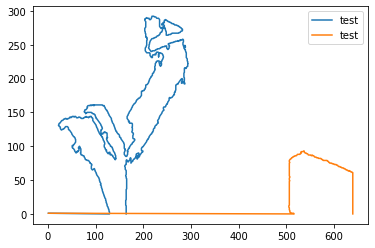

In [7]:
import matplotlib.pyplot as plt
# プロット
plt.plot(x, y, label="test")
plt.plot(xx, yy, label="test")
# 凡例の表示
plt.legend()
# プロット表示(設定の反映)
plt.show()

In [ ]:
print(np.argmax(contours[0][:][:][0],axis=0))
print(np.argmax(contours[1][:][:][0],axis=0))

In [ ]:
np.unravel_index(np.argmax(contours[0],axis=0), contours[0][:][:].shape)